<a href="https://colab.research.google.com/github/bajajharsha/machine-learning-journey/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries


*   Pandas - read the dataset
*   NumPy - work with arrays
*   Matplotlib - visualisaton
*   Seaborn - visualisation + involve statistical calc as well


In [110]:
import pandas as pd       # read the dataset
import numpy as np        # work with arrays
import matplotlib.pyplot as plt       # work with arrays
import seaborn as sns                 # involve statistical calc as well
%matplotlib inline

# Read the Data

Using Pandas

1.   read_csv
2.   head() - print the data



In [111]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

1.   Find Missing Data
2.   Data Cleaning
3.   Converting Categorical Features



## Find Missing Data

In [112]:
# FInd missing data
train.isnull()
# True = null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

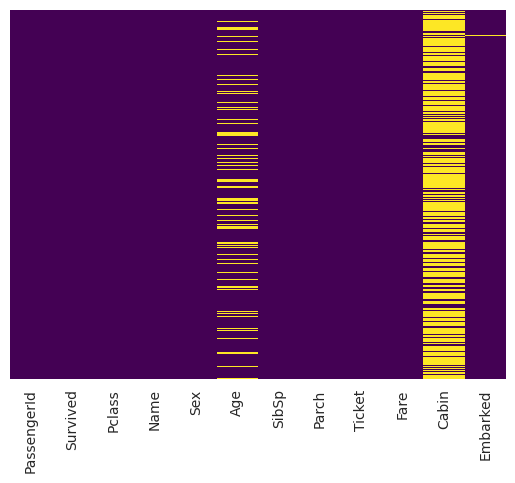

In [113]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# train.isnull() - check this condition
# yticklabels=False - no y axis (record 1, record 2 etc..)
# cbar=False, cmap='viridis' - styling

# Most of the NaN values are in 'age' and 'cabin'

<Axes: xlabel='Survived', ylabel='count'>

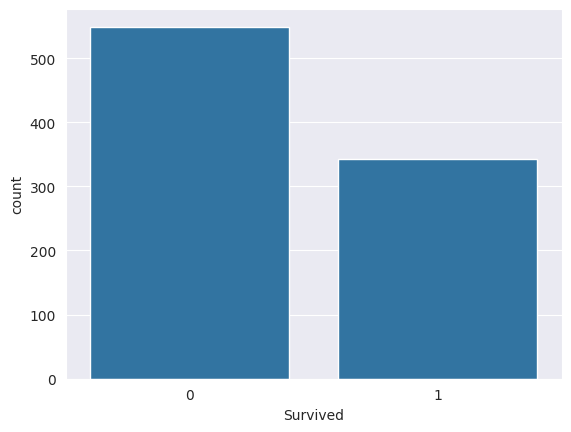

In [114]:
sns.set_style('darkgrid')                     #styling
sns.countplot(x='Survived',data=train)        #shows count of obs

<Axes: xlabel='Survived', ylabel='count'>

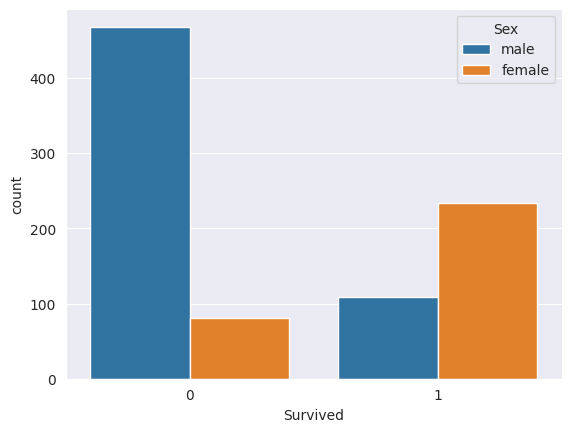

In [115]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=train)

<Axes: xlabel='Survived', ylabel='count'>

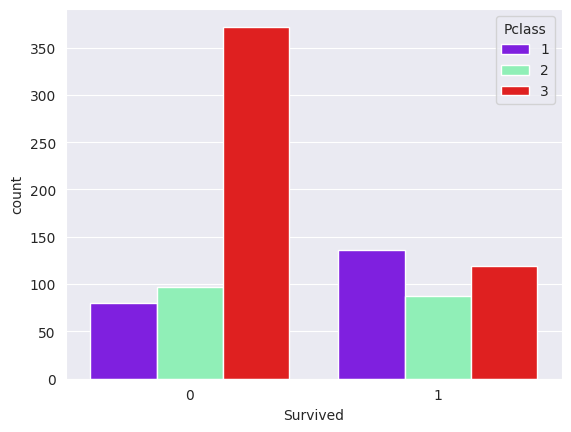

In [116]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

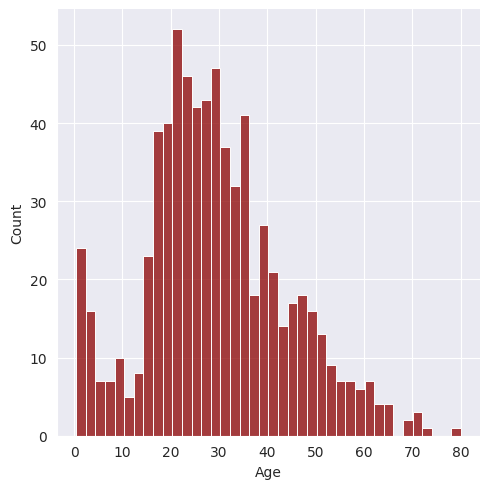

In [117]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=40)
# distplot - create histograms

<Axes: xlabel='SibSp', ylabel='count'>

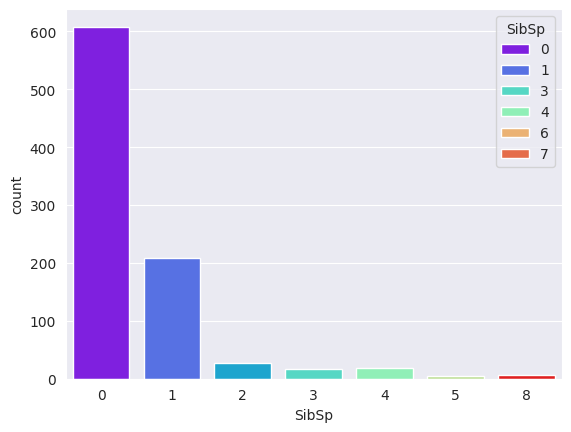

In [118]:
sns.countplot(x='SibSp',data=train,hue='SibSp', palette='rainbow')

## Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class.

**Basically instead of dropping the whole column, we will find the avg age by passenger class and use that to replace the missing value**

** Find the average age of people in each PAssenger class before removing the age (bec age col has many NaN value)

<Axes: xlabel='Pclass', ylabel='Age'>

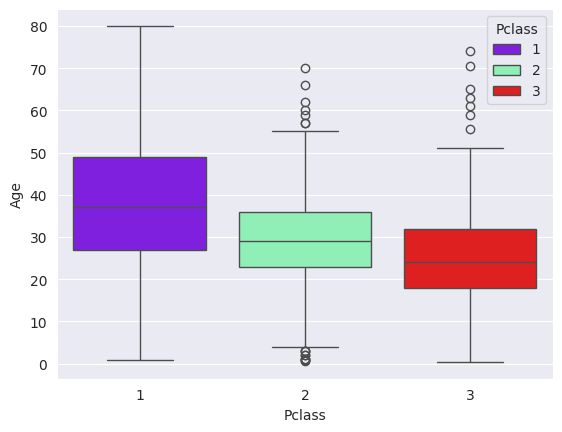

In [119]:
# plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,hue = 'Pclass', palette='rainbow')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [120]:
# Replace the missing age value with the avg age acc to Pclass
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):        # if age is null (true)

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age


In [121]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
# apply - applies the function for each value

<ipython-input-120-966f3182d592>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-120-966f3182d592>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

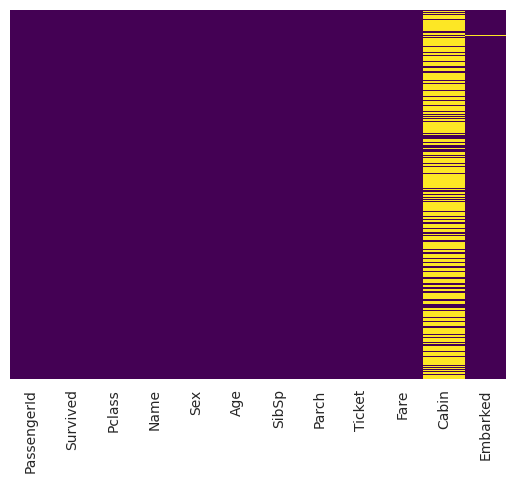

In [122]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [123]:
train.drop('Cabin',axis=1,inplace=True)

<Axes: >

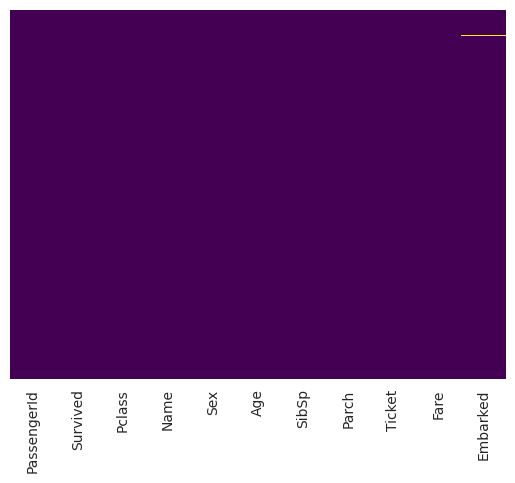

In [124]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [125]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [126]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [127]:
# Create dummy variables
sex = pd.get_dummies(train['Sex'], drop_first=True).astype(int)
embark = pd.get_dummies(train['Embarked'], drop_first=True).astype(int)

In [128]:
# Drop unnecessary columns
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [129]:
# Concatenate the dummy variables back
train = pd.concat([train, sex, embark], axis=1)

In [130]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building a Logistic Regression model


## Train Test Split

In [131]:
train.drop('Survived',axis=1).head()
# dropping bec it is our dependent feature

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [132]:
train['Survived'].head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [133]:
from sklearn.model_selection import train_test_split


- **`train.drop('Survived', axis=1)`**: Removes the target column `'Survived'` from the features.
- **`train['Survived']`**: The target variable we want to predict.
- **`test_size=0.30`**: 30% of data is used for testing, 70% for training.
- **`random_state=101`**: Ensures reproducibility of the data split.

**Result**:  
- `X_train`, `y_train`: Features and target for training (70% of data).
- `X_test`, `y_test`: Features and target for testing (30% of data).

In [134]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.30,
                                                    random_state=101)

## Training and Predicting

In [135]:
from sklearn.linear_model import LogisticRegression

In [138]:
logmodel = LogisticRegression(solver='liblinear', max_iter=200)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [139]:
predictions = logmodel.predict(X_test)

In [140]:
from sklearn.metrics import confusion_matrix

In [141]:
accuracy=confusion_matrix(y_test,predictions)

In [142]:
accuracy

array([[135,  19],
       [ 41,  73]])

In [143]:
from sklearn.metrics import accuracy_score

In [144]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7761194029850746

In [145]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])